In [54]:
import pandas as pd
import xarray as xr
import numpy as np
from scipy.interpolate import griddata

In [55]:
ks = xr.open_dataset("./kc_raster_final/kc_2015-2019.nc")
df = pd.read_csv('./ET_data/ET_o Estimate PJS.csv', index_col=[0], parse_dates=True)

In [59]:
ET_array=ks.copy()
ET_array=ET_array.resample(time='1M').nearest(tolerance="1Y")

In [60]:
xv, yv = np.meshgrid(ks['lon'].values, ks['lat'].values)

In [61]:
ET_array.kc[:,:,:]=np.nan   #reference data cube for ET
for i in range(len(ET_array.time)):
    month=str(ET_array.time.values[i])[:7]
    #month = '2015-01' # Needs to be run for each month!
    data = df[month]
    data = data[data['ETo'].notna()]
    points = (data['lon'].values, data['lat'].values)
    ETo = data['ETo'].values
    result=griddata(points, ETo, (xv,yv), method='nearest')
    ET_array.kc[i,:,:]=result[:,:]

In [62]:
result=griddata(points, ETo, (xv,yv), method='nearest')

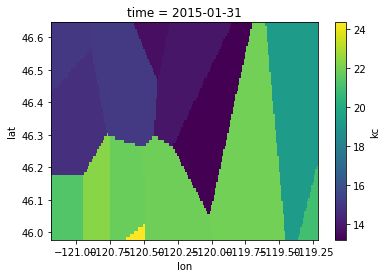

In [63]:
%matplotlib inline
ET_array.kc[0,:,:].plot()